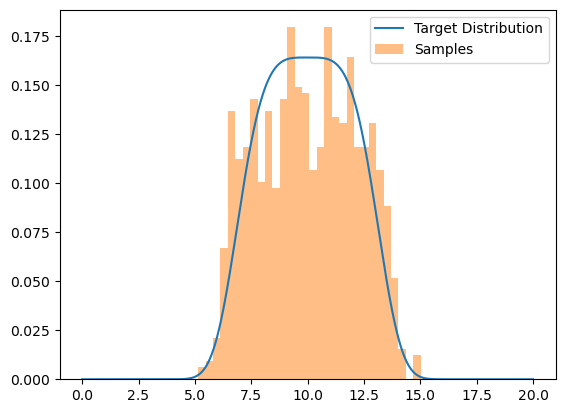

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Target distribution function p(x)
def target_distribution(x):
    return 0.164 * np.exp(-((x - 10)**4) / 128)

# Proposal distribution function q(x)
def proposal_distribution(x, mu=10, sigma=5):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2)

# Rejection sampling
def rejection_sampling(num_samples):
    samples = []
    M = 1.2  # Adjust this value based on the chosen proposal distribution

    while len(samples) < num_samples:
        x = np.random.normal(10, 5)  # Sample from the proposal distribution
        u = np.random.uniform(0, 1)

        # Accept the sample with probability p(x) / (M * q(x))
        if u < target_distribution(x) / (M * proposal_distribution(x)):
            samples.append(x)

    return np.array(samples)

# Draw 1000 samples
num_samples = 1000
samples = rejection_sampling(num_samples)

# Plot the samples and the target distribution
x_values = np.linspace(0, 20, 1000)
plt.plot(x_values, target_distribution(x_values), label='Target Distribution')
plt.hist(samples, bins=30, density=True, alpha=0.5, label='Samples')
plt.legend()
plt.show()

In [2]:
import numpy as np

# Target distribution function p(x)
def target_distribution(x):
    return 0.164 * np.exp(-((x - 10)**4) / 128)

# Proposal distribution function q(x)
def proposal_distribution(x, mu=10, sigma=5):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2)

# Function whose expectation value we want to estimate
def f(x):
    return x**2  # Replace with your desired function

# Importance sampling
def importance_sampling(num_samples):
    samples_q = np.random.normal(10, 5, num_samples)  # Sample from the proposal distribution
    weights = target_distribution(samples_q) / proposal_distribution(samples_q)

    expectation_estimate = np.sum(f(samples_q) * weights) / np.sum(weights)

    return expectation_estimate

# Draw 1000 samples using rejection sampling (from part 1)
num_samples_rejection = 1000
samples_rejection = rejection_sampling(num_samples_rejection)

# Use importance sampling to estimate the expectation value
expectation_estimate = importance_sampling(num_samples_rejection)

# Compare with the mean of the samples from part 1
mean_samples_rejection = np.mean(samples_rejection)

print(f"Mean of samples from rejection sampling: {mean_samples_rejection}")
print(f"Importance sampling estimate: {expectation_estimate}")

Mean of samples from rejection sampling: 9.978950520462249
Importance sampling estimate: 102.97183108118658


In [3]:
import numpy as np

# Target distribution function p(x)
def target_distribution(x):
    return 0.164 * np.exp(-((x - 10)**4) / 128)

# Proposal distribution function q(x)
def proposal_distribution(x, mu=10, sigma=5):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2)

# Function whose expectation value we want to estimate (x^2)
def f(x):
    return x**2

# Importance sampling
def importance_sampling(num_samples):
    samples_q = np.random.normal(10, 5, num_samples)  # Sample from the proposal distribution
    weights = target_distribution(samples_q) / proposal_distribution(samples_q)

    expectation_estimate = np.sum(f(samples_q) * weights) / np.sum(weights)

    return expectation_estimate

# Use importance sampling to estimate the expectation value of x^2
num_samples_importance = 1000
expectation_estimate = importance_sampling(num_samples_importance)

print(f"Importance sampling estimate for E[x^2]: {expectation_estimate}")

Importance sampling estimate for E[x^2]: 103.40901448888917
